In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import json

import pathlib

In [3]:
suffix = "mscred"
group = ["magnetics"]

In [4]:
file_path = f"data/raw/{suffix}"
path = pathlib.Path().absolute().parent.parent / file_path / f"data_{group[0]}_{suffix}.nc"

with (xr.open_dataset(path) as train):
    #subset = train.sel(shot_id=shots[])
    data_train = train.load()

In [5]:
data_train

<xarray.Dataset> Size: 41MB
Dimensions:                                   (time: 40082,
                                               b_field_pol_probe_cc_channel: 5,
                                               b_field_pol_probe_ccbv_channel: 40,
                                               b_field_pol_probe_obr_channel: 18,
                                               b_field_pol_probe_obv_channel: 18,
                                               b_field_pol_probe_omv_channel: 3,
                                               b_field_tor_probe_cc_channel: 3,
                                               b_field_tor_probe_saddle_field_channel: 12,
                                               b_field_tor_probe_saddle_voltage_channel: 12,
                                               flux_loop_channel: 15)
Coordinates:
  * b_field_pol_probe_cc_channel              (b_field_pol_probe_cc_channel) <U13 260B ...
  * b_field_pol_probe_ccbv_channel            (b_field_pol_probe_ccbv_channel) <U10 2kB ...
  * b_field_pol_probe_obr_channel             (b_field_pol_probe_obr_channel) <U9 648B ...
  * b_field_pol_probe_obv_channel             (b_field_pol_probe_obv_channel) <U9 648B ...
  * b_field_pol_probe_omv_channel             (b_field_pol_probe_omv_channel) <U11 132B ...
  * b_field_tor_probe_cc_channel              (b_field_tor_probe_cc_channel) <U13 156B ...
  * b_field_tor_probe_saddle_field_channel    (b_field_tor_probe_saddle_field_channel) <U11 528B ...
  * b_field_tor_probe_saddle_voltage_channel  (b_field_tor_probe_saddle_voltage_channel) <U15 720B ...
  * flux_loop_channel                         (flux_loop_channel) <U12 720B '...
  * time                                      (time) float64 321kB -0.0692 .....
Data variables:
    b_field_pol_probe_cc_field                (time, b_field_pol_probe_cc_channel) float64 2MB ...
    b_field_pol_probe_ccbv_field              (time, b_field_pol_probe_ccbv_channel) float64 13MB ...
    b_field_pol_probe_obr_field               (time, b_field_pol_probe_obr_channel) float64 6MB ...
    b_field_pol_probe_obv_field               (time, b_field_pol_probe_obv_channel) float64 6MB ...
    b_field_pol_probe_omv_voltage             (time, b_field_pol_probe_omv_channel) float64 962kB ...
    b_field_tor_probe_cc_field                (time, b_field_tor_probe_cc_channel) float64 962kB ...
    b_field_tor_probe_saddle_field            (time, b_field_tor_probe_saddle_field_channel) float64 4MB ...
    b_field_tor_probe_saddle_voltage          (time, b_field_tor_probe_saddle_voltage_channel) float64 4MB ...
    flux_loop_flux                            (time, flux_loop_channel) float64 5MB ...
    ip                                        (time) float64 321kB -354.1 ......
    shot_index                                (time) int64 321kB 0 0 0 ... 19 19
Attributes:
    description:  
    imas:         magnetics
    label:        Plasma Current
    name:         magnetics
    uda_name:     AMC_PLASMA CURRENT
    units:        A

In [7]:
group = "magnetics"
file_path = f"notebooks/result_files/all_shots_{group}"
path = pathlib.Path().absolute().parent.parent / file_path / f"result_lists_{group}.json"

with open(path, "r") as f:
    data = json.load(f)
    good_vars_name = data["good_vars_ids"]

good_vars_name

['b_field_pol_probe_obr_field::AMB_OBR01',
 'b_field_pol_probe_obr_field::AMB_OBR04',
 'b_field_pol_probe_obr_field::AMB_OBR05',
 'b_field_pol_probe_obr_field::AMB_OBR06',
 'b_field_pol_probe_obr_field::AMB_OBR07',
 'b_field_pol_probe_obr_field::AMB_OBR08',
 'b_field_pol_probe_obr_field::AMB_OBR09',
 'b_field_pol_probe_obr_field::AMB_OBR10',
 'b_field_pol_probe_obr_field::AMB_OBR12',
 'b_field_pol_probe_obr_field::AMB_OBR13',
 'b_field_pol_probe_obr_field::AMB_OBR14',
 'b_field_pol_probe_obr_field::AMB_OBR15',
 'b_field_pol_probe_obr_field::AMB_OBR16',
 'b_field_pol_probe_obr_field::AMB_OBR17',
 'b_field_pol_probe_obr_field::AMB_OBR18',
 'b_field_tor_probe_saddle_voltage::XMB_SAD/OUT/M01',
 'b_field_tor_probe_saddle_voltage::XMB_SAD/OUT/M02',
 'b_field_tor_probe_saddle_voltage::XMB_SAD/OUT/M03',
 'b_field_tor_probe_saddle_voltage::XMB_SAD/OUT/M04',
 'b_field_tor_probe_saddle_voltage::XMB_SAD/OUT/M05',
 'b_field_tor_probe_saddle_voltage::XMB_SAD/OUT/M06',
 'b_field_tor_probe_saddle_volt

In [8]:
# Variable and channel names separation
var_channel_df = pd.DataFrame(good_vars_name, columns=["full_name"])
var_channel_df[["variable", "channel"]] = var_channel_df["full_name"].str.split("::", expand=True)
var_channel_df.head(37)


,full_name,variable,channel
0,b_field_pol_probe_obr_field::AMB_OBR01,b_field_pol_probe_obr_field,AMB_OBR01
1,b_field_pol_probe_obr_field::AMB_OBR04,b_field_pol_probe_obr_field,AMB_OBR04
2,b_field_pol_probe_obr_field::AMB_OBR05,b_field_pol_probe_obr_field,AMB_OBR05
3,b_field_pol_probe_obr_field::AMB_OBR06,b_field_pol_probe_obr_field,AMB_OBR06
4,b_field_pol_probe_obr_field::AMB_OBR07,b_field_pol_probe_obr_field,AMB_OBR07
5,b_field_pol_probe_obr_field::AMB_OBR08,b_field_pol_probe_obr_field,AMB_OBR08
6,b_field_pol_probe_obr_field::AMB_OBR09,b_field_pol_probe_obr_field,AMB_OBR09
7,b_field_pol_probe_obr_field::AMB_OBR10,b_field_pol_probe_obr_field,AMB_OBR10
8,b_field_pol_probe_obr_field::AMB_OBR12,b_field_pol_probe_obr_field,AMB_OBR12
9,b_field_pol_probe_obr_field::AMB_OBR13,b_field_pol_probe_obr_field,AMB_OBR13


In [9]:
channel_counts = var_channel_df.groupby("variable").size().sort_values(ascending=False)
channel_counts

variable
b_field_pol_probe_ccbv_field        36
b_field_pol_probe_obr_field         15
flux_loop_flux                      14
b_field_pol_probe_obv_field         13
b_field_tor_probe_saddle_voltage     9
b_field_tor_probe_saddle_field       8
ip                                   1
dtype: int64

In [10]:
set(var_channel_df["variable"])

{'b_field_pol_probe_ccbv_field',
 'b_field_pol_probe_obr_field',
 'b_field_pol_probe_obv_field',
 'b_field_tor_probe_saddle_field',
 'b_field_tor_probe_saddle_voltage',
 'flux_loop_flux',
 'ip'}

In [11]:
def filter_xr_dataset_channels(data_train: xr.Dataset, var_channel_df: pd.DataFrame) -> xr.Dataset:
    """
    Filtre les channels des variables de data_train selon var_channel_df.
    Supprime les variables non listées dans var_channel_df.

    Args:
        data_train (xr.Dataset): Dataset contenant les variables avec ou sans dimension 'channel'
        var_channel_df (pd.DataFrame): DataFrame avec colonnes ["variable", "channel"]

    Returns:
        xr.Dataset: Dataset filtré
    """
    # Set des variables à conserver
    variables_to_keep = set(var_channel_df["variable"])
    
    # Nouveau Dataset filtré
    filtered_data = {}

    for variable in variables_to_keep:
        if variable not in data_train:
            continue  # ignorer si la variable est absente

        da = data_train[variable]
        channels_to_keep = var_channel_df.loc[var_channel_df["variable"] == variable, "channel"].tolist()

        # Cas 1 : pas de dimension 'channel' → garder tel quel
        if "channel" not in da.dims:
            filtered_data[variable] = da
            continue

        # Cas 2 : on filtre les channels
        available_channels = set(str(c) for c in da.channel.values)
        valid_channels = [ch for ch in channels_to_keep if str(ch) in available_channels]

        if not valid_channels:
            print(f"Aucun channel valide trouvé pour '{variable}', variable ignorée.")
            continue

        filtered_data[variable] = da.sel(channel=valid_channels)

    final = xr.Dataset(filtered_data)

    final["shot_index"] = data_train["shot_index"]

    return final

a = filter_xr_dataset_channels(data_train, var_channel_df)
data_train = a

In [12]:
for var in data_train.data_vars:
    shape = data_train[var].shape
    dims = data_train[var].dims
    print(f"{var:<40} shape: {shape}  dims: {dims}")

flux_loop_flux                           shape: (20798, 15)  dims: ('time', 'flux_loop_channel')
b_field_pol_probe_obr_field              shape: (20798, 18)  dims: ('time', 'b_field_pol_probe_obr_channel')
b_field_tor_probe_saddle_field           shape: (20798, 12)  dims: ('time', 'b_field_tor_probe_saddle_field_channel')
ip                                       shape: (20798,)  dims: ('time',)
b_field_pol_probe_obv_field              shape: (20798, 18)  dims: ('time', 'b_field_pol_probe_obv_channel')
b_field_tor_probe_saddle_voltage         shape: (20798, 12)  dims: ('time', 'b_field_tor_probe_saddle_voltage_channel')
b_field_pol_probe_ccbv_field             shape: (20798, 40)  dims: ('time', 'b_field_pol_probe_ccbv_channel')
shot_index                               shape: (20798,)  dims: ('time',)


In [13]:
print(data_train.data_vars)

Data variables:
    flux_loop_flux                    (time, flux_loop_channel) float64 2MB 4...
    b_field_pol_probe_obr_field       (time, b_field_pol_probe_obr_channel) float64 3MB ...
    b_field_tor_probe_saddle_field    (time, b_field_tor_probe_saddle_field_channel) float64 2MB ...
    ip                                (time) float64 166kB -1.071e+03 ... nan
    b_field_pol_probe_obv_field       (time, b_field_pol_probe_obv_channel) float64 3MB ...
    b_field_tor_probe_saddle_voltage  (time, b_field_tor_probe_saddle_voltage_channel) float64 2MB ...
    b_field_pol_probe_ccbv_field      (time, b_field_pol_probe_ccbv_channel) float64 7MB ...
    shot_index                        (time) int64 166kB 0 0 0 0 0 ... 7 7 7 7 7


### 1. Variable visualization

In [14]:
ip = data_train["ip"]
ip_values = ip.values
time = data_train.time.values
index = data_train.shot_index.values

ip_values

array([-1071.1262207 , -1197.96273804, -1175.28231812, ...,
       -9702.578125  , -8980.48999022,            nan], shape=(20798,))

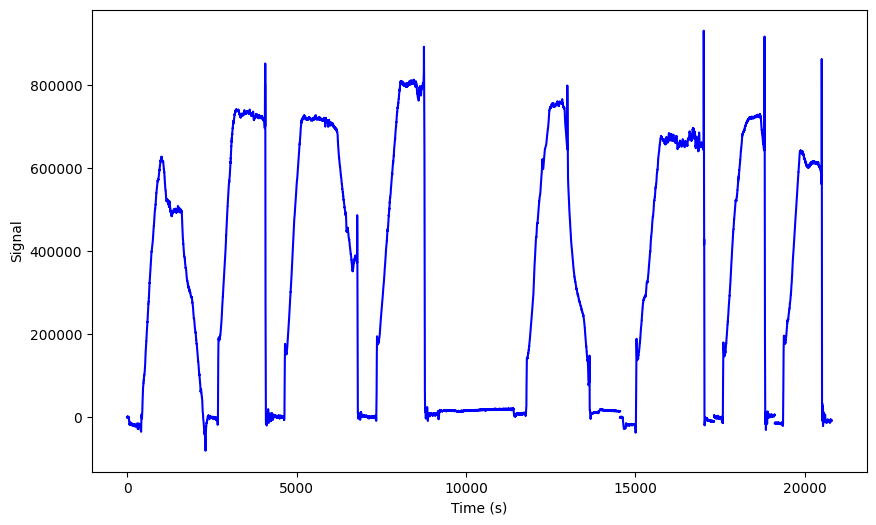

In [15]:
mask0 = (index == 1)

figure, ax = plt.subplots(figsize=(10, 6))
ax.plot(ip_values[:60000], label="Shot 0", color="blue")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Signal")
plt.show()


### 2. NaN proportion for each variables

Goal: find empty variables


In [16]:
def compute_nan_proportions_variables(data: xr.Dataset, sorted: bool = False, ascend_sorting: bool = False) -> pd.DataFrame:
    """
    Compute the proportion of NaN values for each variable in the dataset.

    Parameters
    data_train (xr.Dataset): The input dataset containing variables to analyze.
    sorted (bool): If True, sort the results by NaN proportion in descending order.

    Returns
    pd.DataFrame: A DataFrame containing the variable names, channel names (if applicable), and their NaN proportions.
    """
    results = []
    best_channel = []

    # Parcours des variables du Dataset
    for var_name, da in data.data_vars.items():
        dims = da.dims
        
        if 'time' not in dims:
            # Skip variables that do not have a time dimension
            continue

        if len(dims) == 1:
            # 1D variable (time)
            total = da.sizes['time']
            n_nan = da.isnull().sum().item()
            prop = 100 * n_nan / total
            results.append((var_name, None, prop))
            if prop < 1.:
                best_channel.append((var_name, None, prop))


        elif len(dims) == 2:
            # 2D variable (time, channel)
            time_dim, channel_dim = dims
            for i, channel in enumerate(data[channel_dim].values):
                series = da.isel({channel_dim: i})
                total = series.sizes[time_dim]
                n_nan = series.isnull().sum().item()
                prop = 100 * n_nan / total
                results.append((var_name, str(channel), prop))
                if prop < 1.:
                    best_channel.append((var_name, str(channel), prop))

    df_nan_stats = pd.DataFrame(results, columns=['variable', 'channel', 'nan_ratio'])

    if sorted:
        df_nan_stats = df_nan_stats.sort_values(by='nan_ratio', ascending=ascend_sorting).reset_index(drop=True)

    return df_nan_stats, best_channel

In [17]:
result_var, best_channels = compute_nan_proportions_variables(data=data_train, sorted=True, ascend_sorting=True)
result_var

,variable,channel,nan_ratio
0,shot_index,None,0.000000
1,flux_loop_flux,AMB_FL/CC03,0.033657
2,flux_loop_flux,AMB_FL/CC05,0.033657
3,flux_loop_flux,AMB_FL/CC04,0.033657
4,flux_loop_flux,AMB_FL/CC09,0.033657
...,...,...,...
112,b_field_pol_probe_obv_field,AMB_OBV10,100.000000
113,b_field_tor_probe_saddle_field,ASM_SAD/M10,100.000000
114,b_field_tor_probe_saddle_field,ASM_SAD/M09,100.000000
115,b_field_tor_probe_saddle_field,ASM_SAD/M12,100.000000


In [18]:
print("Number of variables with NaN proportions less than 1%: ", len(best_channels))
for chan in best_channels:
    print(f"Variable: {chan[0]}, Channel: {chan[1]}, NaN Proportion: {chan[2]}")

Number of variables with NaN proportions less than 1%:  68
Variable: flux_loop_flux, Channel: AMB_FL/CC03, NaN Proportion: 0.033657082411770366
Variable: flux_loop_flux, Channel: AMB_FL/CC04, NaN Proportion: 0.033657082411770366
Variable: flux_loop_flux, Channel: AMB_FL/CC05, NaN Proportion: 0.033657082411770366
Variable: flux_loop_flux, Channel: AMB_FL/CC07, NaN Proportion: 0.033657082411770366
Variable: flux_loop_flux, Channel: AMB_FL/CC09, NaN Proportion: 0.033657082411770366
Variable: flux_loop_flux, Channel: AMB_FL/P3U/1, NaN Proportion: 0.033657082411770366
Variable: flux_loop_flux, Channel: AMB_FL/P3U/4, NaN Proportion: 0.033657082411770366
Variable: flux_loop_flux, Channel: AMB_FL/P4L/1, NaN Proportion: 0.033657082411770366
Variable: flux_loop_flux, Channel: AMB_FL/P4L/4, NaN Proportion: 0.033657082411770366
Variable: flux_loop_flux, Channel: AMB_FL/P4U/4, NaN Proportion: 0.033657082411770366
Variable: flux_loop_flux, Channel: AMB_FL/P5L/1, NaN Proportion: 0.033657082411770366


In [20]:
file_path = "notebooks/result_files/nan_stats"
path = pathlib.Path().absolute().parent.parent / file_path / f"nan_stats_by_vars{suffix}.csv"
result_var.to_csv(path, index=False)

### 3. NaN proportion for each shot per variables

Goals: Delete shots where too many NaN

In [ ]:
def compute_nan_proportions_shots(data: xr.Dataset, sorted: bool = False, ascend_sorting: bool = False) -> pd.DataFrame:
    """
    Compute the proportion of NaN values for each variable in the dataset, grouped by shot.

    Parameters
    data (xr.Dataset): The input dataset containing variables to analyze.
    sorted (bool): If True, sort the results by NaN proportion in descending order.
    ascend_sorting (bool): If True, sort in ascending order; if False, sort in descending order.

    Returns
    pd.DataFrame: A DataFrame containing the variable names, channel names (if applicable), and their NaN proportions per shot.
    """

    shot_index = data['shot_index'].values
    unique_shots = np.unique(shot_index)

    results = []

    for var_name, da in data.data_vars.items():
        dims = da.dims

        if 'time' not in dims:
            continue

        if len(dims) == 1:
            # 1D variable (time)
            row = {'variable': var_name, 'channel': None}
            for shot in unique_shots:
                shot_mask = (shot_index == shot)
                total = shot_mask.sum()
                n_nan = da.isnull().values[shot_mask].sum()
                row[f'shot_{shot}'] = 100 * n_nan / total if total > 0 else np.nan
            results.append(row)

        elif len(dims) == 2:
            # 2D variable (time, channel)
            _, channel_dim = dims
            for i, channel_val in enumerate(data[channel_dim].values):
                row = {'variable': var_name, 'channel': str(channel_val)}
                series = da.isel({channel_dim: i})
                for shot in unique_shots:
                    shot_mask = (shot_index == shot)
                    total = shot_mask.sum()
                    n_nan = series.isnull().values[shot_mask].sum()
                    row[f'shot_{shot}'] = 100 * n_nan / total if total > 0 else np.nan
                results.append(row)

    df_nan_by_shot = pd.DataFrame(results)

    if sorted:
        # Find the maximum NaN proportion across all shots for each variable/channel
        max_nan_cols = [col for col in df_nan_by_shot.columns if col.startswith('shot_')]
        df_nan_by_shot['max_nan_ratio'] = df_nan_by_shot[max_nan_cols].max(axis=1)
        df_nan_by_shot = df_nan_by_shot.sort_values(by='max_nan_ratio', ascending=ascend_sorting).reset_index(drop=True)
    
    return df_nan_by_shot

In [72]:
result_per_shot = compute_nan_proportions_shots(data=data_train, sorted=False)
result_per_shot

,variable,channel,shot_0,shot_1,shot_2,shot_3,shot_4,shot_5,shot_6,shot_7,...,shot_260,shot_261,shot_262,shot_263,shot_264,shot_265,shot_266,shot_267,shot_268,shot_269
0,flux_loop_flux,AMB_FL/CC03,0.0,0.0,0.000488,0.000368,0.0,0.0,0.000427,0.0,...,0.000538,0.0,0.0,0.0,0.0,0.0,0.0,0.000503,0.000356,0.0
1,flux_loop_flux,AMB_FL/CC04,0.0,0.0,0.000488,0.000368,0.0,0.0,0.000427,0.0,...,0.000538,0.0,0.0,0.0,0.0,0.0,0.0,0.000503,0.000356,0.0
2,flux_loop_flux,AMB_FL/CC05,0.0,0.0,0.000488,0.000368,0.0,0.0,0.000427,0.0,...,0.000538,0.0,0.0,0.0,0.0,0.0,0.0,0.000503,0.000356,0.0
3,flux_loop_flux,AMB_FL/CC07,0.0,0.0,0.000488,0.000368,0.0,0.0,0.000427,0.0,...,0.000538,0.0,0.0,0.0,0.0,0.0,0.0,0.000503,0.000356,0.0
4,flux_loop_flux,AMB_FL/CC09,0.0,0.0,0.000488,0.000368,0.0,0.0,0.000427,0.0,...,0.000538,0.0,0.0,0.0,0.0,0.0,0.0,0.000503,0.000356,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,b_field_pol_probe_obv_field,AMB_OBV15,0.0,0.0,0.000488,0.000368,0.0,0.0,0.000427,0.0,...,0.000538,0.0,0.0,0.0,0.0,0.0,0.0,0.000503,0.000356,0.0
113,b_field_pol_probe_obv_field,AMB_OBV16,0.0,0.0,0.000488,0.000368,0.0,0.0,0.000427,0.0,...,0.000538,0.0,0.0,0.0,0.0,0.0,0.0,0.000503,0.000356,0.0
114,b_field_pol_probe_obv_field,AMB_OBV17,0.0,0.0,0.000488,0.000368,0.0,0.0,0.000427,0.0,...,0.000538,0.0,0.0,0.0,0.0,0.0,0.0,0.000503,0.000356,0.0
115,b_field_pol_probe_obv_field,AMB_OBV18,0.0,0.0,0.000488,0.000368,0.0,0.0,0.000427,0.0,...,0.000538,0.0,0.0,0.0,0.0,0.0,0.0,0.000503,0.000356,0.0


In [ ]:
file_path = f"notebooks/result_files/nan_stats_{group}"
path = pathlib.Path().absolute().parent.parent / file_path / f"nan_stats_by_shot{suffix}.csv"
result_per_shot.to_csv(path, index=False)